# Deep Learning Basic Block (딥러닝 골격구조)


- 중요성: 딥러닝의 기본 구조, 절차를 이해하고 모델의 결과를 분석함으로써 더 나은 모델을 설계하는데 도움이 된다는 점에서 중요합니다.


- 적용: Loss function을 통해 손실을 이해하여 알맞는 Learning Rate를 설정할 수 있고, 훈련/검증 정확도를 계산하여 overfitting을 알아낼 수 있습니다.



# 기본용어 정리


ⓐ Tensor

Tensor는 data interface의 표준으로 N-dimension array로 표현

ⓑ Epoch

한 Epoch은 훈련 데이터셋에 포함되어 있는 모든 데이터값들이 각각 한번씩 예측 모델에 들어온 뒤 weight 값을 갱신하는 주기를 의미 

ex) 사람의 손글씨를 판별하는 예측 모델을 훈련하기 위해 100장의 이미지와 그에 해당하는 라벨(Label)을 가지고 있다고 가정했을때 첫번째부터 100번째까지 모든 이미지-데이터 쌍을 한번씩 모델에 넣어 훈련을 시켰다면 1 Epoch 만큼의 훈련을 진행합니다.

ⓒ Batch Size

하나의 Batch를 몇개의 데이터로 구성할 것인지에 대한 용량.

ex) 100개의 이미지-라벨이 있는 상황에서 Batch Size를 5로 정했다면 모델은 한번에 하나의 데이터를 볼때마다 매번 가중치 값을 갱신하지 않고 5개 데이터에 대한 값을 한번에 계산한 뒤 가중치를 갱신해주게 되므로 총 20번의 갱신 과정만을 거치게 됩니다.

# 딥러닝 절차



1. Data Preparation (데이터 전처리)

가지고 있는 데이터를 Model로 적용하기 쉽도록 알맞는 Tensor구조로 처리합니다.

2. Model Implementation (모델 구현)

풀고자 하는 문제의 통계적 모델링을 적용하여 학습

3. Loss Implemetation (Loss 적용)

실제 정답과의 오차계산

4. Updater Implementation (Updater 적용)

파라미터 학습을 통한 모델 업데이트

5. Iterative Learning (반복 학습)

줄이는 과정 반복

# Batch Gradient Descent (BGD)


전체 데이터에 대해 모두 탐색하고, 계산하여 모델의 parameter 를 업데이트 함으로써 새로운 모델을 찾아내는 방법입니다. 전체 데이터를 모두 살피고 일괄적으로 계산하기 때문에 'Batch'라고도 불립니다. 

- 장점

전체 데이터에 대해 업데이트가 한번에 이루어지기 때문에 업데이트 횟수가 적고 전체적인 계산 횟수는 적습니다.


병렬처리에 유리합니다.


- 단점

한 스텝에 모든 학습 데이터 셋을 사용하므로 학습이 오래 걸립니다.


전체 학습 데이터에 대한 error 를 모델의 업데이트가 이루어지기 전까지 축적해야 하므로 더 많은 메모리가 필요합니다.

# Stochastic Gradient Descent (SGD)

매 훈련 iteration마다 Data를 randomly shuffle하고 오직 하나의 가장 첫 번째 예제만 사용하여 모델의 parameter를 업데이트함으로써 새로운 모델을 찾아내는 방법입니다.

![title](Image/10-1.png)

- 장점

local optimal 에 빠질 리스크가 적습니다.

step 에 걸리는 시간이 짧기 때문에 수렴속도가 상대적으로 빠릅니다.

- 단점

global optimal 을 찾지 못 할 가능성이 있습니다.

데이터를 한개씩 처리하기 때문에 GPU의 성능을 전부 활용할 수 없습니다.

# Mini-Batch Gradient Descent(MSGD)

Batch Size만큼 update에 활용하며 한 번의 iteration이 끝나면 다음 예제로 넘어가는 방법이다. 만약 Batch Size가 3이라면 3만큼 살펴보고 parameter를 업데이트하고를 반복한다.

![title](Image/10-2.png)

- 장점

BGD보다 local optimal 에 빠질 리스크가 적습니다.

SGD보다 병렬처리에 유리합니다.

전체 학습데이터가 아닌 일부분의 학습데이터만 사용하기 때문에 메모리 사용이 BGD 보다 적습니다.

- 단점

batch size(mini-batch size) 를 설정해야 합니다.

에러에 대한 정보를 mini-batch 크기 만큼 축적해서 계산해야 하기 때문에 SGD 보다 메모리 사용이 높습니다.


# Loss Function

(== objective function, error, cost function)

손실 함수(loss)는 forward pass 동안 개개의 배치(batch)에서 계산되고 따라서 훈련(training) 과정에서 추적하기 용이합니다. 이는 예측과 정답의 term을 나타내는 지표로 사용합니다. 아래는 시간에 따른 손실 그래프의 모양을 여러 학습 속도(learning rate)에 따라 그려본 것입니다.

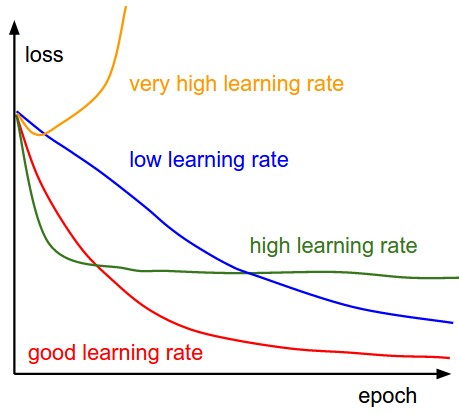

훈련 과정에서 학습 속도의 영향

낮은 학습 속도로는 선형적인 향상이 이루어질 것입니다.

높은 학습 속도에서는 좀 더 지수적인(exponential) 향상이 보일 것입니다.

더 높은 학습 속도는 손실의 감소를 가속할 것이나, 더 나쁜 손실값에 빠지게 할 수도 있습니다(초록 선).

그 이유는 최적화에 너무 많은 "에너지"가 가해져서 파라미터값들이 혼돈스러운 형태로 움직이고 (최적화 목적함수 모양에서) 좋은 곳에 정착하기가 힘들어지기 때문입니다. 

# Train/Validation Accuracy

훈련/검증 정확도(training/validation accuracy)는 분류기 훈련시 추적해야 할 또다른 중요한 값으로 모델이 과적합(overfitting)중 인지를 발견할 수 있는 지표로 사용됩니다.

![title](Image/10-4.png)

훈련/검증 정확도의 차이는 오버피팅의 정도를 가리킬 수 있습니다.

파란색 (검증 오류) 곡선: 훈련 정확도에 비하여 매우 낮은 검증 정확도를 보여주고 있는데, 이는 강한 과적합의 가능성을 보여줍니다. 어떤 지점 이후에 검증 정확도가 갑자기 떨어질 수 있는 지도 확인 가능합니다. 보통 훈련 데이터에만 치중되어 학습된 모뎅리 다음과 같은 그래프로 나타날 수 있습니다.